# Li Lecture 7 Homework: LIME and SHAP Calculations on a Random Forest Model
## Author: Allyson Vasquez | ITCS 6040 | 10/19/2022  
  
Prompt: Fit a random forest model to a dataset and calculate LIME and SHapley values for the prediction of the 5th observation.

In [41]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## About the Dataset

I decided to use `bank_marketing.csv` as my dataset. This dataset contains 17 attributes with ~35,000 records on potential customers. The last attribute `y` is our desired output of if the bank campaign was successful on a potential customer. Other attributes describe their basic background, level of education, and details about the campaign (how the potential customas was contacted, duration of each contact, etc.).

In [5]:
# importing the dataset
df = pd.read_csv('bank_marketing.csv')
df.head(10)

age            job   marital  education default  balance housing loan  \
0   51     management   married   tertiary      no     6530     yes   no   
1   27     unemployed   married    primary      no     7459     yes   no   
2   59     management  divorced    primary      no    13308     yes   no   
3   48     technician   married  secondary      no     7373     yes   no   
4   51    blue-collar   married  secondary      no     7180     yes   no   
5   48          admin   married  secondary      no     6532     yes   no   
6   45       services   married  secondary      no     9077     yes   no   
7   50    blue-collar   married  secondary      no     6258     yes   no   
8   32  self-employed    single   tertiary      no    12269      no   no   
9   54    blue-collar  divorced    primary      no     8180      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome    y  
0  unknown    5   may        91         1     -1         0  unknown   no  
1  unknown    9   may       407         2     -1         0  unknown   no  
2  unknown   13   may       131         1     -1         0  unknown   no  
3  unknown   14   may       126         1     -1         0  unknown   no  
4  unknown   14   may       927         1     -1         0  unknown  yes  
5  unknown   14   may       312         5     -1         0  unknown   no  
6  unknown   15   may       139         1     -1         0  unknown   no  
7  unknown   15   may       139         7     -1         0  unknown   no  
8  unknown   16   may       141         1     -1         0  unknown   no  
9  unknown   19   may       312         1     -1         0  unknown   no

In [6]:
df.shape

(35134, 17)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35134 entries, 0 to 35133
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        35134 non-null  int64 
 1   job        35134 non-null  object
 2   marital    35134 non-null  object
 3   education  35134 non-null  object
 4   default    35134 non-null  object
 5   balance    35134 non-null  int64 
 6   housing    35134 non-null  object
 7   loan       35134 non-null  object
 8   contact    35134 non-null  object
 9   day        35134 non-null  int64 
 10  month      35134 non-null  object
 11  duration   35134 non-null  int64 
 12  campaign   35134 non-null  int64 
 13  pdays      35134 non-null  int64 
 14  previous   35134 non-null  int64 
 15  poutcome   35134 non-null  object
 16  y          35134 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.6+ MB


In [65]:
# stats for attributes
df.describe()

age        balance           day      duration      campaign  \
count  35134.000000   35134.000000  35134.000000  35134.000000  35134.000000   
mean      40.857062    1151.503102     15.779074    259.112512      2.747823   
std       10.594897    2839.332249      8.341386    257.764233      3.048390   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      66.000000      8.000000    103.000000      1.000000   
50%       39.000000     419.000000     16.000000    181.000000      2.000000   
75%       48.000000    1291.000000     21.000000    321.000000      3.000000   
max       95.000000  102127.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  35134.000000  35134.000000  
mean      40.372431      0.577731  
std      100.695254      2.375666  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [75]:
for col in df:
    print("\nUnique Values In " + col + ":",df[col].unique())


Unique Values In age: [51 27 59 48 45 50 32 54 60 39 36 31 33 37 41 47 43 28 42 30 56 38 53 58
 35 44 57 46 26 29 34 49 40 52 55 70 72 64 77 20 25 61 24 69 71 66 67 63
 79 80 23 22 21 62 83 75 65 19 76 82 73 78 94 68 74 95 85 81 18 89 86 84
 92 87 90 93 88]

Unique Values In job: ['management' 'unemployed' 'technician' 'blue-collar' 'admin' 'services'
 'self-employed' 'housemaid' 'unknown' 'retired' 'entrepreneur' 'student']

Unique Values In marital: ['married' 'divorced' 'single']

Unique Values In education: ['tertiary' 'primary' 'secondary' 'unknown']

Unique Values In default: ['no' 'yes']

Unique Values In balance: [ 6530  7459 13308 ...  2916  1519 16353]

Unique Values In housing: ['yes' 'no']

Unique Values In loan: ['no' 'yes']

Unique Values In contact: ['unknown' 'cellular' 'telephone']

Unique Values In day: [ 5  9 13 14 15 16 19 20 21 28 29 30  2  3  4  6 11 12 17 18  7  8 10 22
 23 24 25 31 26 27  1]

Unique Values In month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'jan' 'f

**A random forest model will be fit to this dataset to classify whether the bank campaign was successful on a potential client or not. The goal is to predict is the potential client will become a customer of their new product. LIME and SHAP values will be calculated for the prediction of the 5th observation.**

### Preprocessing - Stratified Sampling
To avoid overfitting, we want to identify and equally distribute the features that may provide higher influence on our target label.

In [80]:
# drop "unknown" or 0 vals
df = df.drop(df.loc[df["job"] == "unknown"].index)
df = df.drop(df.loc[df["education"] == "unknown"].index)
df = df.drop(df.loc[df["balance"] == 0].index)

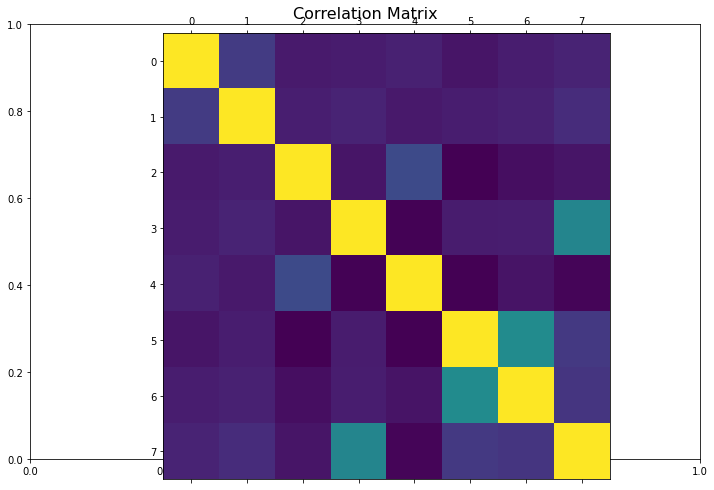

In [89]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

fig = plt.figure(figsize=(12,8))
df['y'] = LabelEncoder().fit_transform(df['y'])

# Separate both dataframes into 
numeric_df = df.select_dtypes(exclude="object")
categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()

plt.title("Correlation Matrix", fontsize=16)
plt.matshow(corr_numeric, fignum=fig.number)

In [98]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['y'])
 
# printing label
Y=label
# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop('y', axis=1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(features, Y, test_size = 0.25, random_state = 0)

In [103]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """
    Encode categorical features as a numeric array.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [104]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Making pipelines
numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["age", "balance", "day", "campaign", "pdays", "previous","duration"])),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["job", "education", "marital", "default", "housing", "loan", "contact", "month",
                                     "poutcome"])),
    ("cat_encoder", CategoricalEncoder(encoding='onehot-dense'))
])

from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", numerical_pipeline),
        ("categorical_pipeline", categorical_pipeline),
    ])

In [107]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

NameError: name 'train_data' is not defined

In [102]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

ValueError: could not convert string to float: 'blue-collar'